In [1]:
import os
os.chdir("E:")

In [2]:
import pandas as pd
import numpy as np                     # For mathematical calculations
import seaborn as sns                  # For data visualization
import matplotlib as mpl
print('Matplotlib version: ', mpl.__version__) # >= 2.0.0
import matplotlib.pyplot as plt        # For plotting graphs
%matplotlib inline
import warnings                        # To ignore any warnings
warnings.filterwarnings("ignore")

Matplotlib version:  2.2.2


In [3]:
print(plt.style.available)
mpl.style.use(['ggplot']) # optional: for ggplot-like style

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


In [71]:
train=pd.read_csv("Train_data.csv",sep=',')
test=pd.read_csv("Test_data.csv",sep=',')

Understandin the data

In [5]:
train.shape, test.shape

((3333, 21), (1667, 21))

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
state                            3333 non-null object
account length                   3333 non-null int64
area code                        3333 non-null int64
phone number                     3333 non-null object
international plan               3333 non-null object
voice mail plan                  3333 non-null object
number vmail messages            3333 non-null int64
total day minutes                3333 non-null float64
total day calls                  3333 non-null int64
total day charge                 3333 non-null float64
total eve minutes                3333 non-null float64
total eve calls                  3333 non-null int64
total eve charge                 3333 non-null float64
total night minutes              3333 non-null float64
total night calls                3333 non-null int64
total night charge               3333 non-null float64
total intl minutes           

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1667 entries, 0 to 1666
Data columns (total 21 columns):
state                            1667 non-null object
account length                   1667 non-null int64
area code                        1667 non-null int64
phone number                     1667 non-null object
international plan               1667 non-null object
voice mail plan                  1667 non-null object
number vmail messages            1667 non-null int64
total day minutes                1667 non-null float64
total day calls                  1667 non-null int64
total day charge                 1667 non-null float64
total eve minutes                1667 non-null float64
total eve calls                  1667 non-null int64
total eve charge                 1667 non-null float64
total night minutes              1667 non-null float64
total night calls                1667 non-null int64
total night charge               1667 non-null float64
total intl minutes           

In [8]:
train['Churn'].value_counts()

 False.    2850
 True.      483
Name: Churn, dtype: int64

In [9]:
train['Churn'].value_counts(normalize=True)

 False.    0.855086
 True.     0.144914
Name: Churn, dtype: float64

In [10]:
train.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


Univariate Analysis

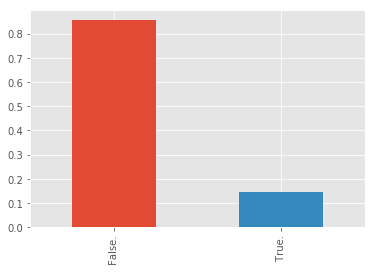

In [11]:
train['Churn'].value_counts(normalize=True).plot.bar()

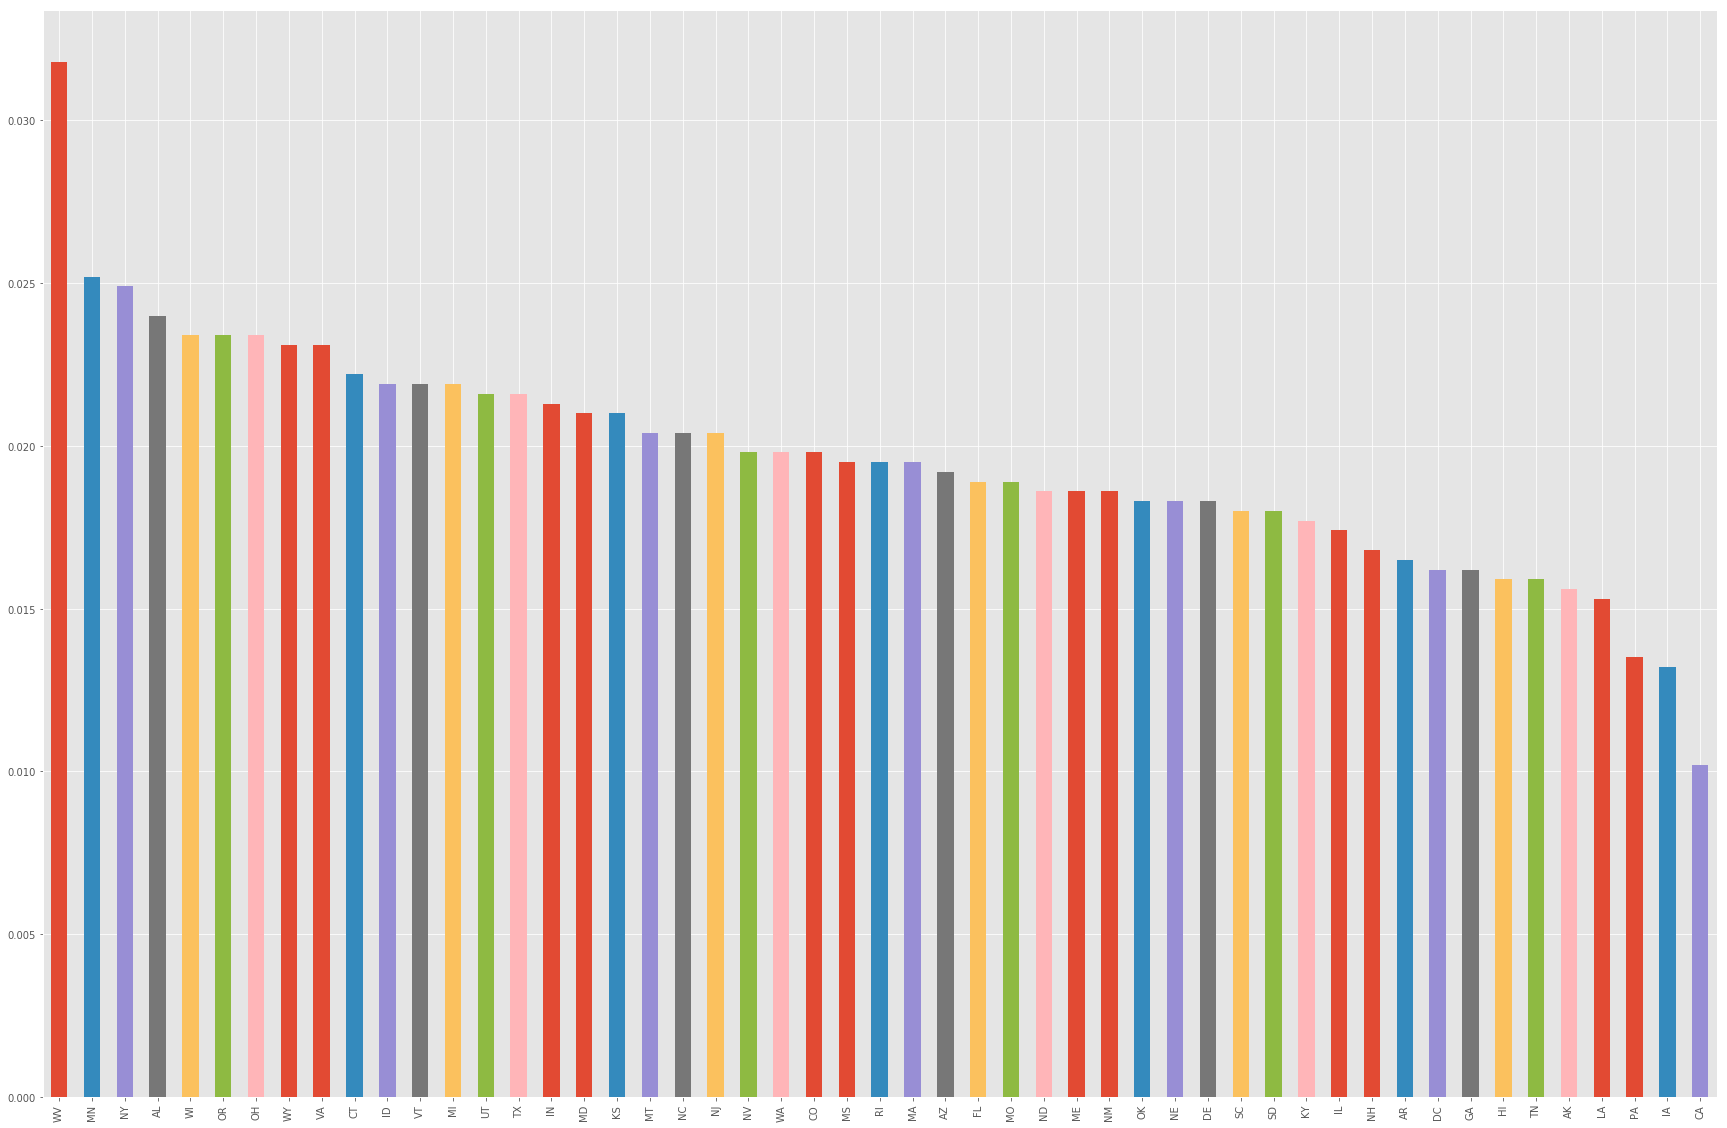

In [12]:
train['state'].value_counts(normalize=True).plot.bar(figsize=(30,20))

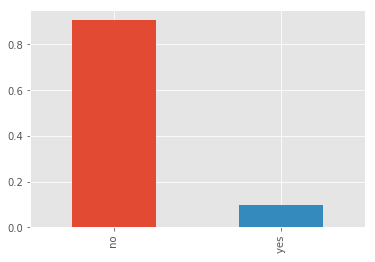

In [13]:
train['international plan'].value_counts(normalize=True).plot.bar()

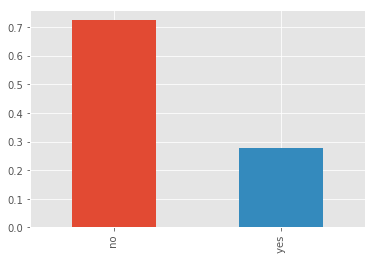

In [14]:
train['voice mail plan'].value_counts(normalize=True).plot.bar()

[ 99 227 499 734 767 575 286 111  28   7]
[  1.   25.2  49.4  73.6  97.8 122.  146.2 170.4 194.6 218.8 243. ]


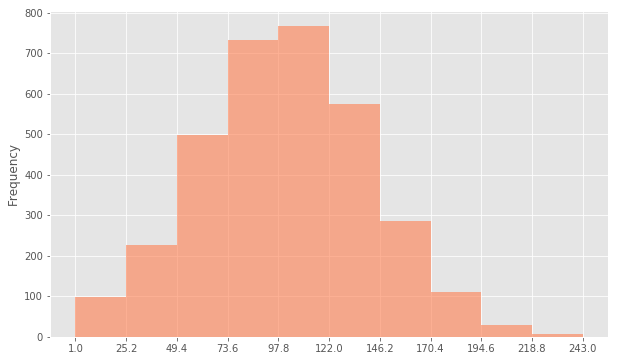

In [15]:
count,bin_edges=np.histogram(train['account length'])
train['account length'].plot(kind='hist',figsize=(10,6),bins=10,alpha=0.6,
                                    xticks=bin_edges,
                                    color=['coral', 'darkslateblue', 'mediumseagreen'],
                                   stacked=True)
                                
print(count)
print(bin_edges)

[2412    5   28   75  175  233  208  134   50   13]
[ 0.   5.1 10.2 15.3 20.4 25.5 30.6 35.7 40.8 45.9 51. ]


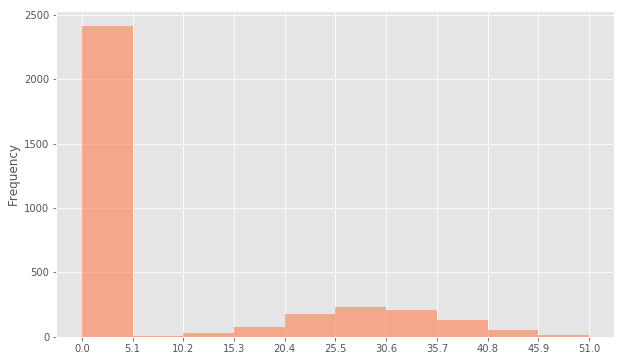

In [16]:
count,bin_edges=np.histogram(train['number vmail messages'])
train['number vmail messages'].plot(kind='hist',figsize=(10,6),bins=10,alpha=0.6,
                                    xticks=bin_edges,
                                    color=['coral', 'darkslateblue', 'mediumseagreen'],
                                   stacked=True)
                                
print(count)
print(bin_edges)

[ 14  67 201 479 798 812 594 264  84  20]
[  0.    35.08  70.16 105.24 140.32 175.4  210.48 245.56 280.64 315.72
 350.8 ]


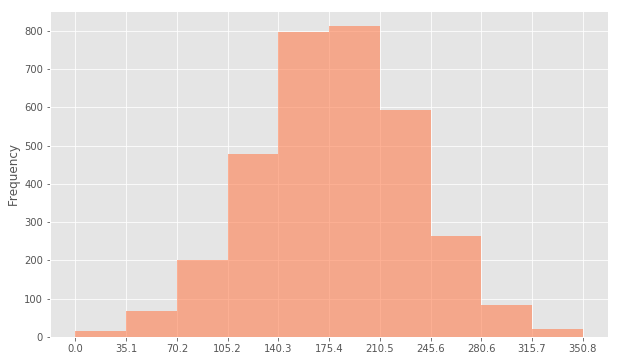

In [17]:
count,bin_edges=np.histogram(train['total day minutes'])
train['total day minutes'].plot(kind='hist',figsize=(10,6),bins=10,alpha=0.6,
                                    xticks=bin_edges,
                                    color=['coral', 'darkslateblue', 'mediumseagreen'],
                                   stacked=True)
                                
print(count)
print(bin_edges)

[   2    1   19  116  469  917 1055  554  179   21]
[  0.   16.5  33.   49.5  66.   82.5  99.  115.5 132.  148.5 165. ]


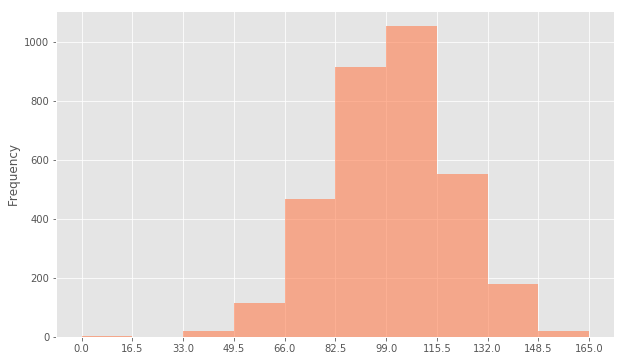

In [18]:
count,bin_edges=np.histogram(train['total day calls'])
train['total day calls'].plot(kind='hist',figsize=(10,6),bins=10,alpha=0.6,
                                    xticks=bin_edges,
                                    color=['coral', 'darkslateblue', 'mediumseagreen'],
                                   stacked=True)
                                
print(count)
print(bin_edges)

[ 14  67 201 479 798 812 594 264  84  20]
[ 0.     5.964 11.928 17.892 23.856 29.82  35.784 41.748 47.712 53.676
 59.64 ]


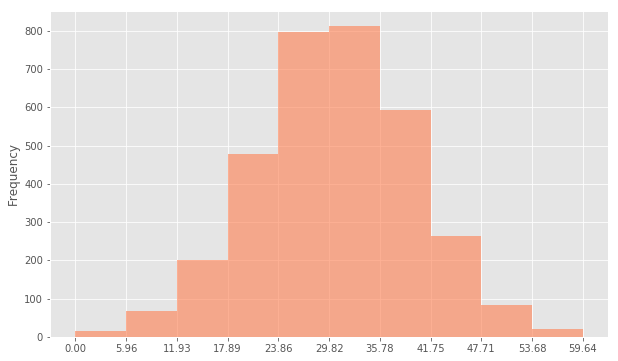

In [19]:
count,bin_edges=np.histogram(train['total day charge'])
train['total day charge'].plot(kind='hist',figsize=(10,6),bins=10,alpha=0.6,
                                    xticks=bin_edges,
                                    color=['coral', 'darkslateblue', 'mediumseagreen'],
                                   stacked=True)
                                
print(count)
print(bin_edges)

[   2    0   20  159  526 1034 1025  434  121   12]
[  0.  17.  34.  51.  68.  85. 102. 119. 136. 153. 170.]


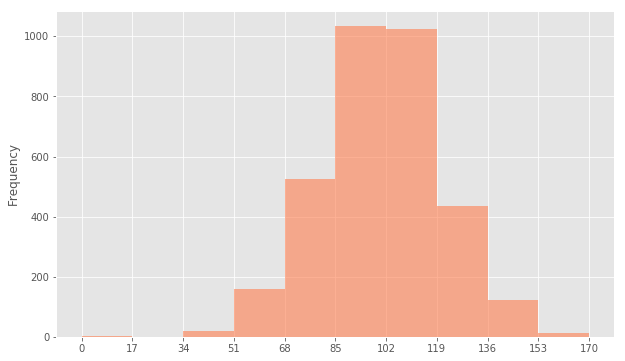

In [20]:
count,bin_edges=np.histogram(train['total eve calls'])
train['total eve calls'].plot(kind='hist',figsize=(10,6),bins=10,alpha=0.6,
                                    xticks=bin_edges,
                                    color=['coral', 'darkslateblue', 'mediumseagreen'],
                                   stacked=True)
                                
print(count)
print(bin_edges)

[  2  21  87 339 742 932 716 375  98  21]
[  0.    36.37  72.74 109.11 145.48 181.85 218.22 254.59 290.96 327.33
 363.7 ]


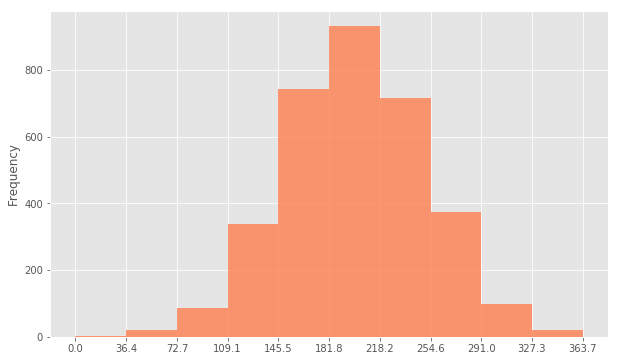

In [21]:
count,bin_edges=np.histogram(train['total eve minutes'])
train['total eve minutes'].plot(kind='hist',figsize=(10,6),bins=10,alpha=0.8,
                                    xticks=bin_edges,
                                    color=['coral', 'darkslateblue', 'mediumseagreen'],
                                   stacked=True)
                                
print(count)
print(bin_edges)

[  2  21  87 339 742 931 717 373 100  21]
[ 0.     3.091  6.182  9.273 12.364 15.455 18.546 21.637 24.728 27.819
 30.91 ]


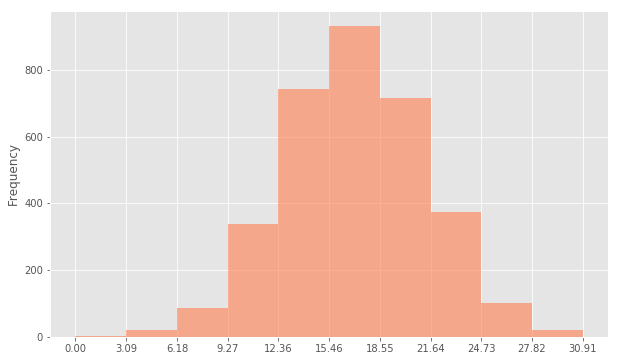

In [22]:
count,bin_edges=np.histogram(train['total eve charge'])
train['total eve charge'].plot(kind='hist',figsize=(10,6),bins=10,alpha=0.6,
                                    xticks=bin_edges,
                                    color=['coral', 'darkslateblue', 'mediumseagreen'],
                                   stacked=True)
                                
print(count)
print(bin_edges)

[ 20  32 158 449 820 968 606 219  52   9]
[ 0.  2.  4.  6.  8. 10. 12. 14. 16. 18. 20.]


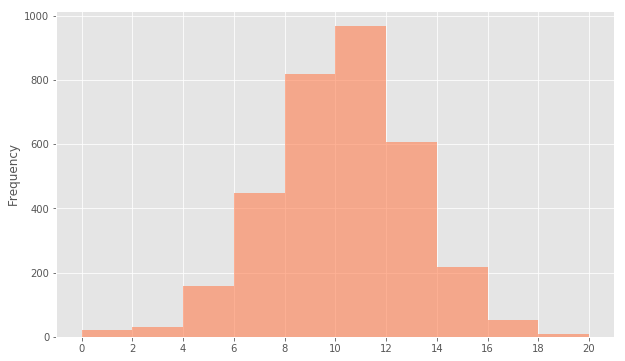

In [23]:
count,bin_edges=np.histogram(train['total intl minutes'])
train['total intl minutes'].plot(kind='hist',figsize=(10,6),bins=10,alpha=0.6,
                                    xticks=bin_edges,
                                    color=['coral', 'darkslateblue', 'mediumseagreen'],
                                   stacked=True)
                                
print(count)
print(bin_edges)

[ 178 1157 1091  554  225   78   29   13    3    5]
[ 0.  2.  4.  6.  8. 10. 12. 14. 16. 18. 20.]


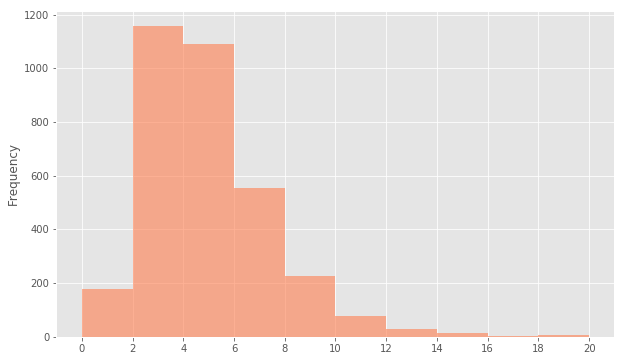

In [24]:
count,bin_edges=np.histogram(train['total intl calls'])
train['total intl calls'].plot(kind='hist',figsize=(10,6),bins=10,alpha=0.6,
                                    xticks=bin_edges,
                                    color=['coral', 'darkslateblue', 'mediumseagreen'],
                                   stacked=True)
                                
print(count)
print(bin_edges)

[ 20  32 158 449 820 968 627 198  52   9]
[0.   0.54 1.08 1.62 2.16 2.7  3.24 3.78 4.32 4.86 5.4 ]


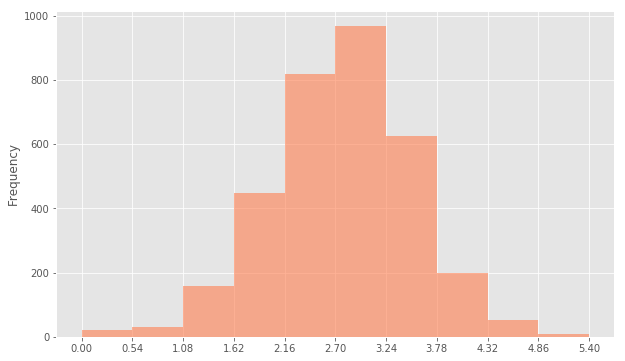

In [25]:
count,bin_edges=np.histogram(train['total intl charge'])
train['total intl charge'].plot(kind='hist',figsize=(10,6),bins=10,alpha=0.6,
                                    xticks=bin_edges,
                                    color=['coral', 'darkslateblue', 'mediumseagreen'],
                                   stacked=True)
                                
print(count)
print(bin_edges)

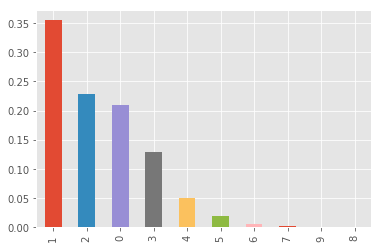

In [26]:
train['number customer service calls'].value_counts(normalize=True).plot.bar()

[ 697 1181  759  429  166   66   22    9    2    2]
[0.  0.9 1.8 2.7 3.6 4.5 5.4 6.3 7.2 8.1 9. ]


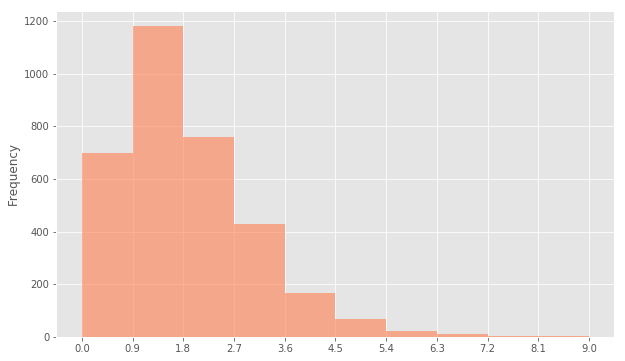

In [27]:
count,bin_edges=np.histogram(train['number customer service calls'])
train['number customer service calls'].plot(kind='hist',figsize=(10,6),bins=10,alpha=0.6,
                                    xticks=bin_edges,
                                    color=['coral', 'darkslateblue', 'mediumseagreen'],
                                   stacked=True)
                                
print(count)
print(bin_edges)

[ 11  56 246 646 910 848 452 132  26   6]
[ 23.2   60.38  97.56 134.74 171.92 209.1  246.28 283.46 320.64 357.82
 395.  ]


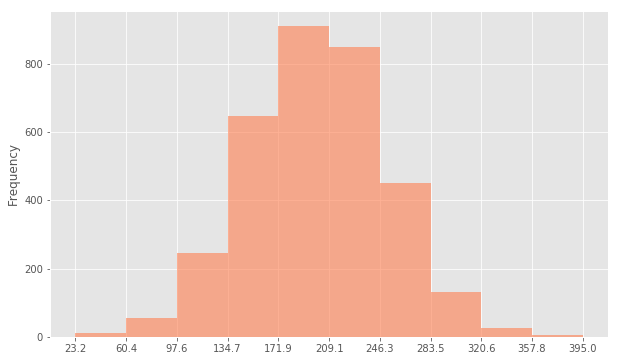

In [28]:
count,bin_edges=np.histogram(train['total night minutes'])
train['total night minutes'].plot(kind='hist',figsize=(10,6),bins=10,alpha=0.6,
                                    xticks=bin_edges,
                                    color=['coral', 'darkslateblue', 'mediumseagreen'],
                                   stacked=True)
                                
print(count)
print(bin_edges)

[  7  71 279 624 888 875 434 121  31   3]
[ 33.   47.2  61.4  75.6  89.8 104.  118.2 132.4 146.6 160.8 175. ]


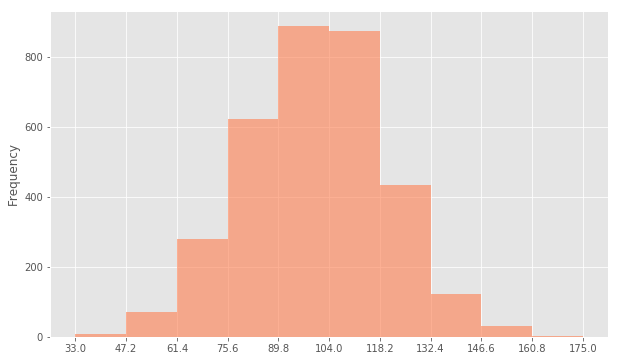

In [29]:
count,bin_edges=np.histogram(train['total night calls'])
train['total night calls'].plot(kind='hist',figsize=(10,6),bins=10,alpha=0.6,
                                    xticks=bin_edges,
                                    color=['coral', 'darkslateblue', 'mediumseagreen'],
                                   stacked=True)
                                
print(count)
print(bin_edges)

[ 11  56 243 649 910 845 455 132  26   6]
[ 1.04   2.713  4.386  6.059  7.732  9.405 11.078 12.751 14.424 16.097
 17.77 ]


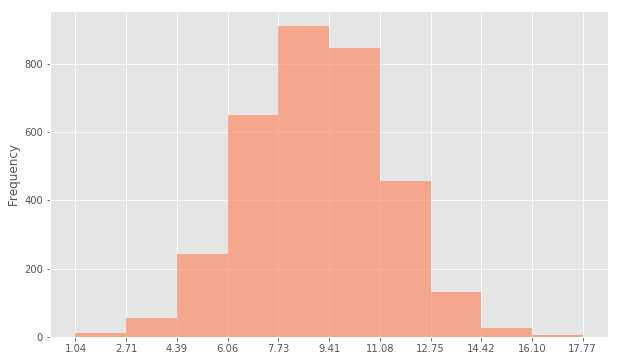

In [30]:
count,bin_edges=np.histogram(train['total night charge'])
train['total night charge'].plot(kind='hist',figsize=(10,6),bins=10,alpha=0.6,
                                    xticks=bin_edges,
                                    color=['coral', 'darkslateblue', 'mediumseagreen'],
                                   stacked=True)
                                
print(count)
print(bin_edges)

Bivariate Analysis

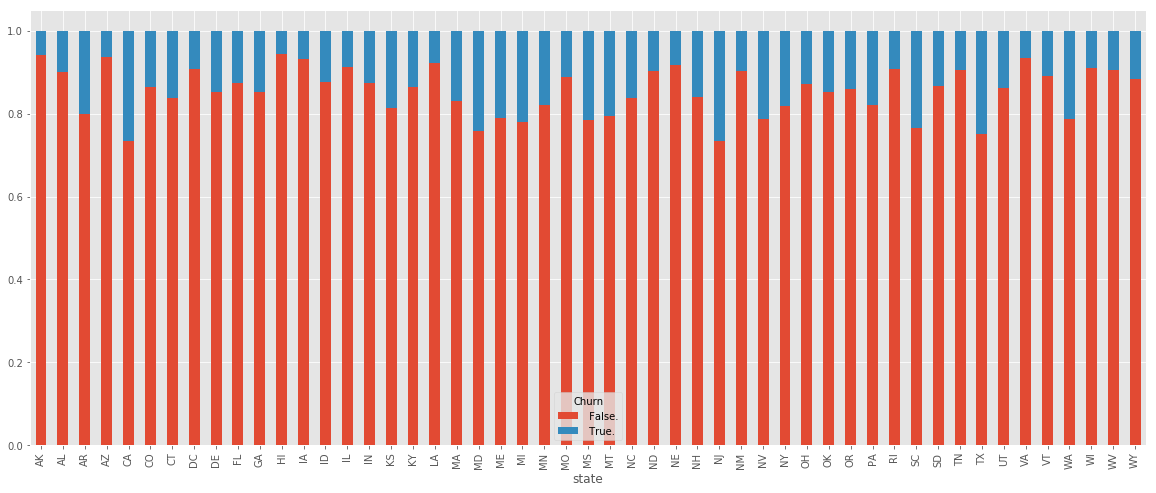

In [31]:
State=pd.crosstab(train['state'],train['Churn'])
State.div(State.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(20,8))

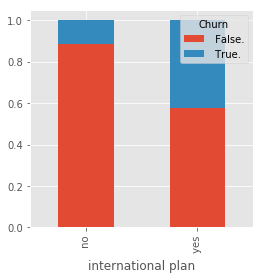

In [32]:
Intl=pd.crosstab(train['international plan'],train['Churn'])
Intl.div(Intl.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

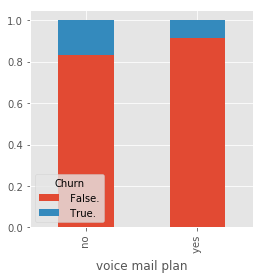

In [33]:
Vmp=pd.crosstab(train['voice mail plan'],train['Churn'])
Vmp.div(Vmp.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

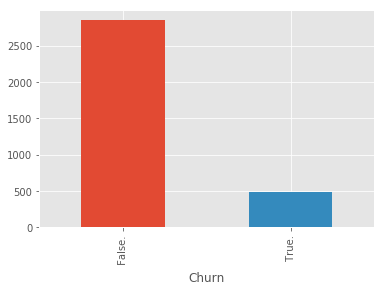

In [34]:
train.groupby('Churn')['total day calls'].count().plot.bar()

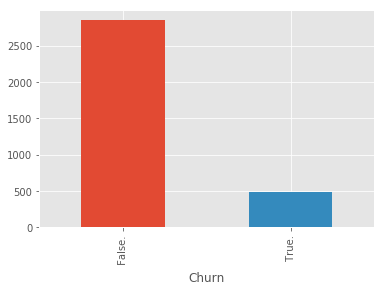

In [35]:
train.groupby('Churn')['total eve calls'].count().plot.bar()

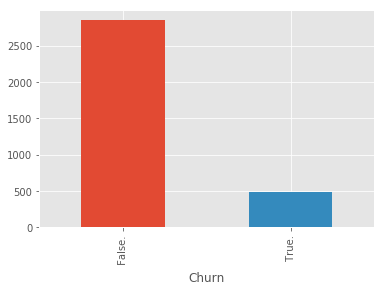

In [36]:
train.groupby('Churn')['total night calls'].count().plot.bar()

In [37]:
train.isnull().sum()

state                            0
account length                   0
area code                        0
phone number                     0
international plan               0
voice mail plan                  0
number vmail messages            0
total day minutes                0
total day calls                  0
total day charge                 0
total eve minutes                0
total eve calls                  0
total eve charge                 0
total night minutes              0
total night calls                0
total night charge               0
total intl minutes               0
total intl calls                 0
total intl charge                0
number customer service calls    0
Churn                            0
dtype: int64

In [38]:
test.isnull().sum()

state                            0
account length                   0
area code                        0
phone number                     0
international plan               0
voice mail plan                  0
number vmail messages            0
total day minutes                0
total day calls                  0
total day charge                 0
total eve minutes                0
total eve calls                  0
total eve charge                 0
total night minutes              0
total night calls                0
total night charge               0
total intl minutes               0
total intl calls                 0
total intl charge                0
number customer service calls    0
Churn                            0
dtype: int64

In [39]:
#Select the Continous Variable
cnames=["account length","area code","number vmail messages","total day minutes","total day calls","total day charge",
       "total eve minutes","total eve calls","total eve charge","total night minutes","total night calls","total night charge",
       "total intl minutes","total intl calls","total intl charge","number customer service calls"]

In [40]:
##Correlation analysis
#Correlation plot
df_corr = train.loc[:,cnames]

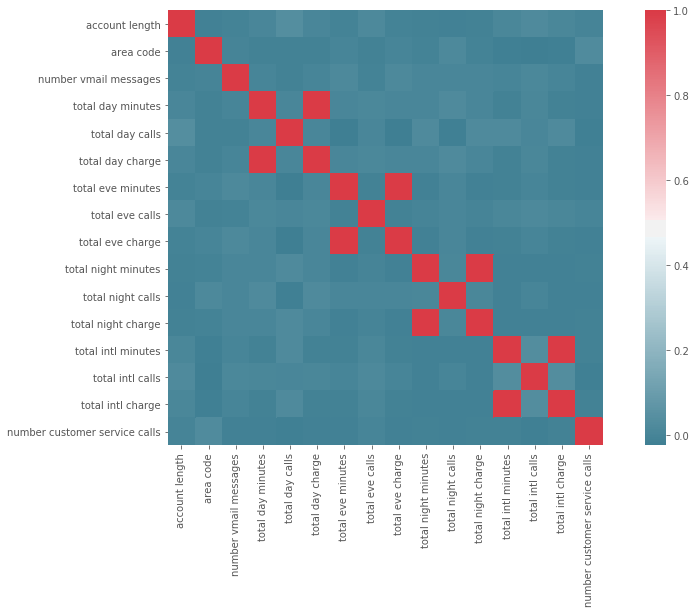

In [41]:
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(15, 8))

#Generate correlation matrix
corr = df_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [42]:
#Chisquare test of independence
#Save categorical variables
cat_names=["state","international plan","voice mail plan"]

In [43]:
#loop for chi square values
from scipy.stats import chi2_contingency
for i in cat_names:
    print(i)
    chi2, p, dof, ex = chi2_contingency(pd.crosstab(train['Churn'], train[i]))
    print(p)

state
0.002296221552011188
international plan
2.4931077033159556e-50
voice mail plan
5.15063965903898e-09


In [72]:
train=train.drop(['area code','phone number','total day charge','total eve charge','total night charge',
                 'total intl charge'],axis=1)

In [73]:
features = train.drop(["Churn"], axis=1).columns

In [74]:
test1= test.copy()

In [75]:
test=test.drop(['phone number','area code','total day charge','total eve charge','total night charge',
                 'total intl charge'],axis=1)

In [76]:
train.shape,test.shape

((3333, 15), (1667, 15))

In [77]:
train.head()

,state,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,number customer service calls,Churn
0,KS,128,no,yes,25,265.1,110,197.4,99,244.7,91,10.0,3,1,False.
1,OH,107,no,yes,26,161.6,123,195.5,103,254.4,103,13.7,3,1,False.
2,NJ,137,no,no,0,243.4,114,121.2,110,162.6,104,12.2,5,0,False.
3,OH,84,yes,no,0,299.4,71,61.9,88,196.9,89,6.6,7,2,False.
4,OK,75,yes,no,0,166.7,113,148.3,122,186.9,121,10.1,3,3,False.


In [78]:
from sklearn.preprocessing import LabelEncoder
number=LabelEncoder()
train['international plan']=number.fit_transform(train['international plan'].astype('str'))
train['voice mail plan']=number.fit_transform(train['voice mail plan'].astype('str'))
train['Churn']=number.fit_transform(train['Churn'].astype('str'))
train['state']=number.fit_transform(train['state'].astype('str'))

In [79]:
test['international plan']=number.fit_transform(test['international plan'].astype('str'))
test['voice mail plan']=number.fit_transform(test['voice mail plan'].astype('str'))
test['Churn']=number.fit_transform(test['Churn'].astype('str'))
test['state']=number.fit_transform(test['state'].astype('str'))

In [80]:
test.head()

,state,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,number customer service calls,Churn
0,11,101,0,0,0,70.9,123,211.9,73,236.0,73,10.6,3,3,0
1,26,137,0,0,0,223.6,86,244.8,139,94.2,81,9.5,7,0,0
2,35,103,0,1,29,294.7,95,237.3,105,300.3,127,13.7,6,1,0
3,32,99,0,0,0,216.8,123,126.4,88,220.6,82,15.7,2,1,0
4,40,108,0,0,0,197.4,78,124.0,101,204.5,107,7.7,4,2,0


In [81]:
X = train.drop('Churn',1)
y = train.Churn

In [82]:
x1=test.drop('Churn',1)
y1=test.Churn

Model Development

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.25)

In [85]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from IPython.display import display, HTML

In [86]:
# Set up our RandomForestClassifier instance and fit to data
clf = RandomForestClassifier(n_estimators=30)
clf.fit(x_train,y_train)

# Make predictions
predictions = clf.predict(x_cv)
probs = clf.predict_proba(x_cv)

In [87]:
score = clf.score(x_cv, y_cv)
print("Accuracy: ", score)

Accuracy:  0.9376498800959233


In [89]:
get_ipython().magic('matplotlib inline')
confusion_matrix = pd.DataFrame(
    confusion_matrix(y_cv, predictions), 
    columns=["Predicted False", "Predicted True"], 
    index=["Actual False", "Actual True"]
)
display(confusion_matrix)

# Calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = roc_curve(y_cv, probs[:,1])
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
#FNR=36

TypeError: 'DataFrame' object is not callable

,importance,labels
5,0.243109,total day minutes
13,0.117440,number customer service calls
7,0.094944,total eve minutes
11,0.079721,total intl minutes
2,0.079135,international plan


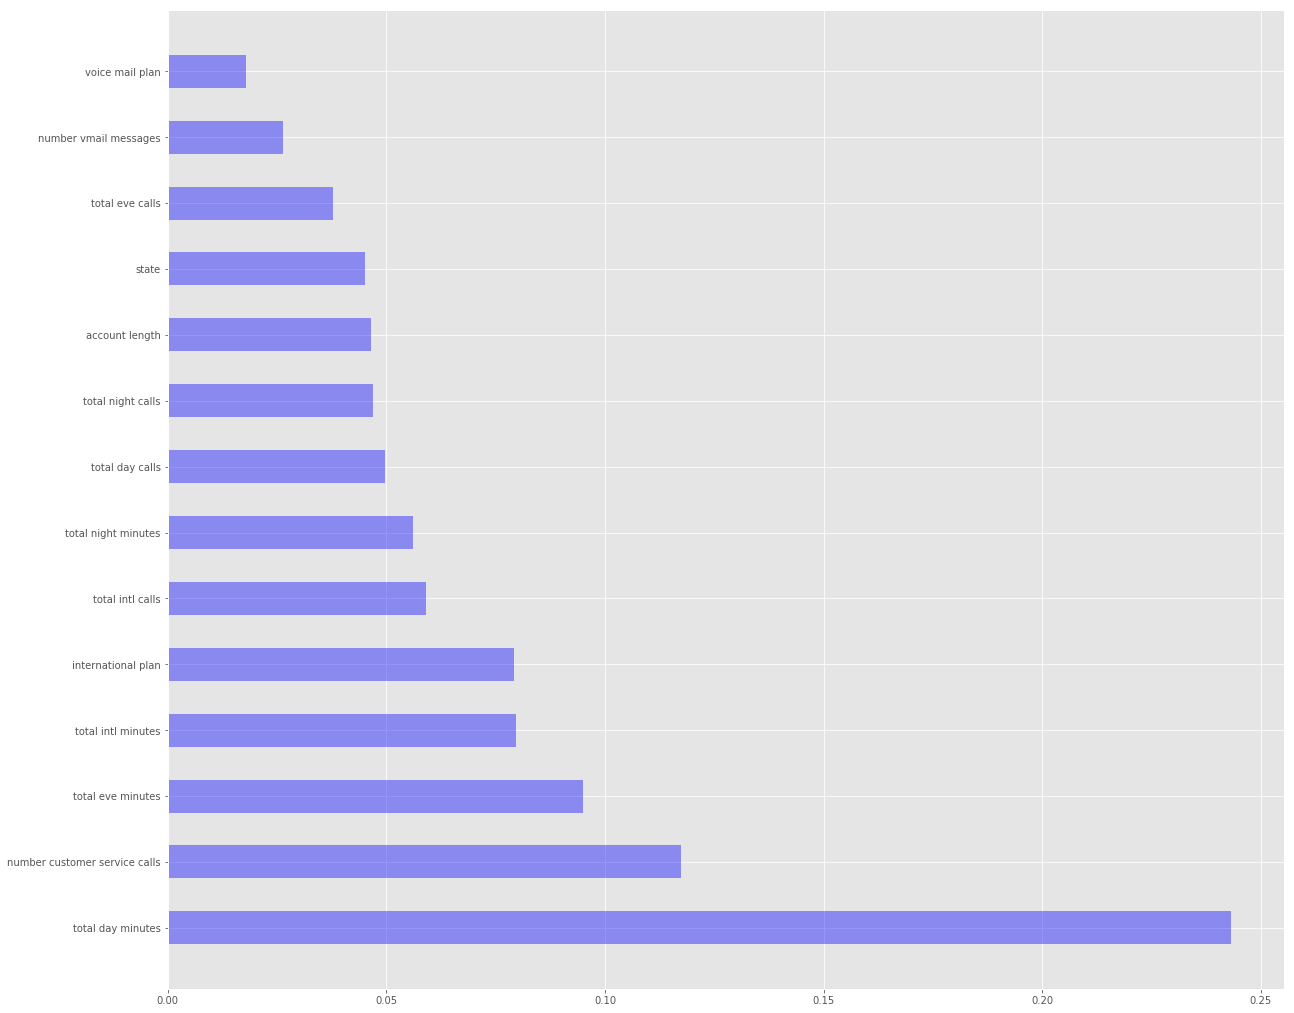

In [90]:
fig = plt.figure(figsize=(20, 18))
ax = fig.add_subplot(111)

df_f = pd.DataFrame(clf.feature_importances_, columns=["importance"])
df_f["labels"] = features
df_f.sort_values("importance", inplace=True, ascending=False)
display(df_f.head(5))

index = np.arange(len(clf.feature_importances_))
bar_width = 0.5
rects = plt.barh(index , df_f["importance"], bar_width, alpha=0.4, color='b', label='Main')
plt.yticks(index, df_f["labels"])
plt.show()

In [91]:
predictions_test = clf.predict(x1)

In [93]:
#build confusion matrix
# from sklearn.metrics import confusion_matrix 
# CM = confusion_matrix(x1, y1)
CM = pd.crosstab(y1, predictions_test)
#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

#check accuracy of model
print(((TP+TN)*100)/(TP+TN+FP+FN))

#False Negative rate 
print((FN*100)/(FN+TP))

#Results
#Accuracy: 94.7
#FNR: 35.7

94.72105578884224
35.714285714285715


In [94]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

In [95]:
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
     print('\n{} of kfold {}'.format(i,kf.n_splits))
     xtr,xvl = X.loc[train_index],X.loc[test_index]
     ytr,yvl = y[train_index],y[test_index]
    
     model = RandomForestClassifier(random_state=1, max_depth=10)
     model.fit(xtr, ytr)
     pred_test = model.predict(xvl)
     score = accuracy_score(yvl,pred_test)
     print('accuracy_score',score)
     i+=1
pred_test = model.predict(x1)


1 of kfold 5
accuracy_score 0.9385307346326837

2 of kfold 5
accuracy_score 0.9265367316341829

3 of kfold 5
accuracy_score 0.9250374812593704

4 of kfold 5
accuracy_score 0.918918918918919

5 of kfold 5
accuracy_score 0.933933933933934


In [97]:
# CM = confusion_matrix(y1, y1)
CM1 = pd.crosstab(y1, pred_test)
#let us save TP, TN, FP, FN
TN = CM1.iloc[0,0]
FN = CM1.iloc[1,0]
TP = CM1.iloc[1,1]
FP = CM1.iloc[0,1]

#check accuracy of model
print(((TP+TN)*100)/(TP+TN+FP+FN))

#False Negative rate 
print((FN*100)/(FN+TP))

#Results
#Accuracy: 93.5
#FNR: 43.3

93.4613077384523
43.30357142857143


In [98]:
#Decision Tree Model

In [99]:
#Import Libraries for decision tree
from sklearn import tree

In [100]:
#Decision Tree
C50_model = tree.DecisionTreeClassifier(criterion='entropy').fit(x_train, y_train)

#predict new test cases
C50_Predictions = C50_model.predict(x_cv)

In [102]:
# CM = confusion_matrix(y_cv, C50_Predictions)
CM2 = pd.crosstab(y_cv, C50_Predictions)
#let us save TP, TN, FP, FN
TN = CM2.iloc[0,0]
FN = CM2.iloc[1,0]
TP = CM2.iloc[1,1]
FP = CM2.iloc[0,1]

#check accuracy of model
print(((TP+TN)*100)/(TP+TN+FP+FN))

#False Negative rate 
print((FN*100)/(FN+TP))

#Results
#Accuracy: 92.4
#FNR: 28

92.44604316546763
28.0


In [103]:
C50_Test=C50_model.predict(x1)

In [104]:
 # CM = confusion_matrix(y1, C50_Test)
CM3 = pd.crosstab(y1, C50_Test)
#let us save TP, TN, FP, FN
TN = CM3.iloc[0,0]
FN = CM3.iloc[1,0]
TP = CM3.iloc[1,1]
FP = CM3.iloc[0,1]

#check accuracy of model
print(((TP+TN)*100)/(TP+TN+FP+FN))

#False Negative rate 
print((FN*100)/(FN+TP))

#Results
#Accuracy: 92.0
#FNR: 33

91.60167966406719
29.910714285714285


In [105]:
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
     print('\n{} of kfold {}'.format(i,kf.n_splits))
     xtr,xvl = X.loc[train_index],X.loc[test_index]
     ytr,yvl = y[train_index],y[test_index]
    
     model = tree.DecisionTreeClassifier(random_state=1)
     model.fit(xtr, ytr)
     pred_test = model.predict(xvl)
     score = accuracy_score(yvl,pred_test)
     print('accuracy_score',score)
     i+=1
pred_test1 = model.predict(x1)


1 of kfold 5
accuracy_score 0.9205397301349325

2 of kfold 5
accuracy_score 0.9055472263868066

3 of kfold 5
accuracy_score 0.9235382308845578

4 of kfold 5
accuracy_score 0.9099099099099099

5 of kfold 5
accuracy_score 0.9009009009009009


In [107]:
# CM = confusion_matrix(y1, pred_test1)
CM4 = pd.crosstab(y1, pred_test1)
#let us save TP, TN, FP, FN
TN = CM4.iloc[0,0]
FN = CM4.iloc[1,0]
TP = CM4.iloc[1,1]
FP = CM4.iloc[0,1]

#check accuracy of model
print(((TP+TN)*100)/(TP+TN+FP+FN))

#False Negative rate 
print((FN*100)/(FN+TP))

#Results
#Accuracy: 91
#FNR: 30.4

90.94181163767247
30.357142857142858


In [108]:
#Logistic Regression Model

In [109]:
from sklearn.linear_model import LogisticRegression

In [110]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [111]:
pred_cv = model.predict(x_cv)

In [112]:
accuracy_score(y_cv,pred_cv)

0.8489208633093526

In [114]:
# CM = confusion_matrix(y_cv, pred_cv)
CM5 = pd.crosstab(y_cv, pred_cv)
#let us save TP, TN, FP, FN
TN = CM5.iloc[0,0]
FN = CM5.iloc[1,0]
TP = CM5.iloc[1,1]
FP = CM5.iloc[0,1]

#check accuracy of model
print(((TP+TN)*100)/(TP+TN+FP+FN))

#False Negative rate 
print((FN*100)/(FN+TP))

#Results
#Accuracy: 84.9
#FNR: 90.4

84.89208633093526
90.4


In [115]:
pred_L = model.predict(x1)

In [116]:
# CM = confusion_matrix(y1, pred_L)
CM6 = pd.crosstab(y1, pred_L)
#let us save TP, TN, FP, FN
TN = CM6.iloc[0,0]
FN = CM6.iloc[1,0]
TP = CM6.iloc[1,1]
FP = CM6.iloc[0,1]

#check accuracy of model
print(((TP+TN)*100)/(TP+TN+FP+FN))

#False Negative rate 
print((FN*100)/(FN+TP))

#Results
#Accuracy: 87.4
#FNR: 83.5

87.40251949610078
82.14285714285714


In [117]:
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
     print('\n{} of kfold {}'.format(i,kf.n_splits))
     xtr,xvl = X.loc[train_index],X.loc[test_index]
     ytr,yvl = y[train_index],y[test_index]
    
     model = LogisticRegression(random_state=1)
     model.fit(xtr, ytr)
     pred_test = model.predict(xvl)
     score = accuracy_score(yvl,pred_test)
     print('accuracy_score',score)
     i+=1
pred_LV = model.predict(x1)
pred=model.predict_proba(xvl)[:,1]


1 of kfold 5
accuracy_score 0.8605697151424287

2 of kfold 5
accuracy_score 0.856071964017991

3 of kfold 5
accuracy_score 0.8665667166416792

4 of kfold 5
accuracy_score 0.8513513513513513

5 of kfold 5
accuracy_score 0.8663663663663663


In [118]:
# CM = confusion_matrix(y1, pred_LV)
CM6 = pd.crosstab(y1, pred_LV)
#let us save TP, TN, FP, FN
TN = CM6.iloc[0,0]
FN = CM6.iloc[1,0]
TP = CM6.iloc[1,1]
FP = CM6.iloc[0,1]

#check accuracy of model
print(((TP+TN)*100)/(TP+TN+FP+FN))

#False Negative rate 
print((FN*100)/(FN+TP))

#Results
#Accuracy: 87.34
#FNR: 82.14

87.40251949610078
82.14285714285714


In [119]:
#Naive Bayes Model

In [120]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB

#Naive Bayes implementation
NB_model = GaussianNB().fit(x_train, y_train)

In [121]:
#predict x_cv
NB_Predictions = NB_model.predict(x_cv)

In [123]:
#Build confusion matrix
CM7 = pd.crosstab(y_cv, NB_Predictions)

#let us save TP, TN, FP, FN
TN = CM7.iloc[0,0]
FN = CM7.iloc[1,0]
TP = CM7.iloc[1,1]
FP = CM7.iloc[0,1]

#check accuracy of model
print(((TP+TN)*100)/(TP+TN+FP+FN))

#False Negative rate 
print((FN*100)/(FN+TP))

#Accuracy: 84.5
#FNR: 64.8

84.53237410071942
64.8


In [124]:
#predict Test case
NB_Test=NB_model.predict(x1)

In [125]:
#Build confusion matrix
CM8 = pd.crosstab(y1, NB_Test)

#let us save TP, TN, FP, FN
TN = CM8.iloc[0,0]
FN = CM8.iloc[1,0]
TP = CM8.iloc[1,1]
FP = CM8.iloc[0,1]

#check accuracy of model
print(((TP+TN)*100)/(TP+TN+FP+FN))

#False Negative rate 
print((FN*100)/(FN+TP))

#Accuracy: 86
#FNR: 61

86.26274745050989
59.82142857142857


Writing the data

In [126]:
test1["Churn"]=predictions_test

In [127]:
test1["Churn"]=test1["Churn"].replace(1,'True')
test1["Churn"]=test1["Churn"].replace(0,'False')

In [128]:
# Writing a csv (output)
test1.to_csv("TestP.csv", index = False)